In [79]:
#GitHub link: https://github.com/sreksoz/Intro-to-Machine-Learning/tree/HW-3--MNIST-And-Classifiers

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [53]:
# Load the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784')

# Convert the data and labels to numpy arrays
X = mnist.data.astype('float32') / 255.0    
y = mnist.target.astype('int32')

# Reshape the images into column vectors
X_t = X.T

In [54]:
print(X.shape)
print(X_t.shape)

(70000, 784)
(784, 70000)


In [55]:
# Perform SVD on X
U, S, Vt = np.linalg.svd(X_t, full_matrices=False)

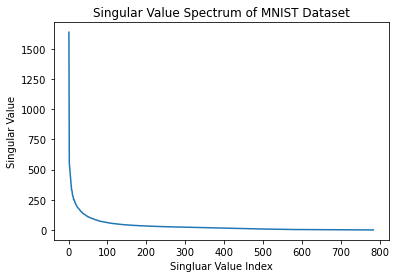

In [56]:
# Plot the singular value spectrum (S matrix)
plt.plot(np.arange(1, len(S) + 1), S)
plt.title('Singular Value Spectrum of MNIST Dataset')
plt.xlabel('Singluar Value Index')
plt.ylabel('Singular Value')
plt.show()

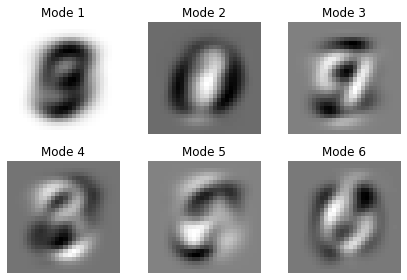

In [57]:
# Plot the six SVD modes from MNIST
fig, axs = plt.subplots(2, 3)
for i in range(6):
    ax = axs[i // 3, i % 3]
    ax.imshow(U[:, i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Mode {}'.format(i+1))
plt.tight_layout()
plt.show()

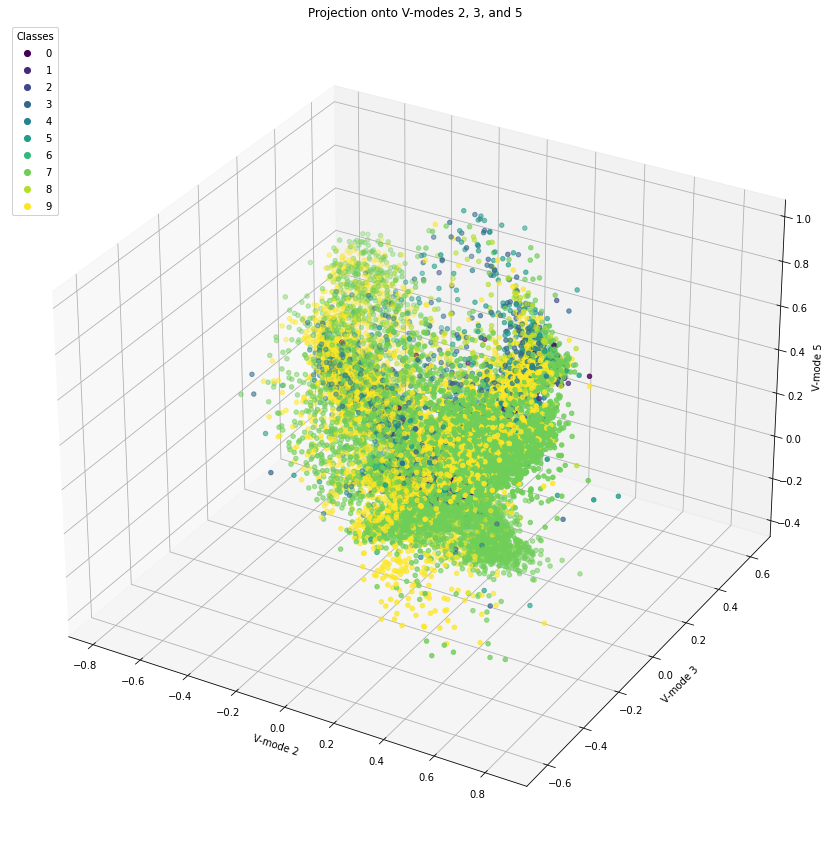

In [58]:
# Get the three selected V-modes (columns) colored by their digit label
Vt_modes = Vt[:, [2,3,5]]

# Project the data onto the modes
projected_data = np.dot(X_t.T, Vt_modes)
#projected_data = np.dot(Vt_modes, X_t.T)

# Create a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
scatter = ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c = y.astype(int))
legend = ax.legend(*scatter.legend_elements(), title='Classes', loc='upper left')
ax.add_artist(legend)

# Add labels to the axes
plt.title('Projection onto V-modes 2, 3, and 5')
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')

# Show the plot
plt.show()

In [59]:
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
X_pca_train = pca.fit_transform(X)

In [60]:
# Extract the data for 0 and 1 digits
label_0 = 0
label_1 = 1

X_0 = X_pca_train[y == label_0]  
X_1 = X_pca_train[y == label_1]
y_0 = y[y == 0] 
y_1 = y[y == 1]

In [61]:
# Split the digit-0 dataset into training and testing sets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

# Split the digit-1 dataset into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [62]:
X_train = np.vstack([X_train_0, X_train_1])
y_train = np.hstack([y_train_0, y_train_1])

In [63]:
# Train a LDA classifier on the PCA-transformed data
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
# Make predictions on the test examples
y_pred_0 = clf.predict(X_test_0)
y_pred_1 = clf.predict(X_test_1)

# Compute the accuracy of the classifier on the test set
acc_0 = np.mean(y_pred_0 == 0)
acc_1 = np.mean(y_pred_1 == 1)
acc = (acc_0 + acc_1) / 2

print(f"Accuracy on digit {label_0}: {acc_0:.3f}")
print(f"Accuracy on digit {label_1}: {acc_1:.3f}")
print(f"Overall accuracy: {acc:.3f}")

Accuracy on digit 0: 0.993
Accuracy on digit 1: 1.000
Overall accuracy: 0.996


In [65]:
# Extract the data for digit 3
label_3 = 3

X_3 = X_pca_train[y == 3]  
y_3 = y[y == 3] 

In [66]:
# Split the digit-0 dataset into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

In [67]:
X_train_new = np.vstack([X_train_0, X_train_1, X_train_3])
y_train_new = np.hstack([y_train_0, y_train_1, y_train_3])

In [68]:
# Train a LDA classifier on the PCA-transformed data
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_new, y_train_new)

LinearDiscriminantAnalysis()

In [69]:
# Make predictions on the test examples
y_pred_0 = clf.predict(X_test_0)
y_pred_1 = clf.predict(X_test_1)
y_pred_3 = clf.predict(X_test_3)

# Compute the accuracy of the classifier on the test set
acc_0 = np.mean(y_pred_0 == 0)
acc_1 = np.mean(y_pred_1 == 1)
acc_3 = np.mean(y_pred_3 == 3)
acc = (acc_0 + acc_1 + acc_3) / 3

print(f"Accuracy on digit {label_0}: {acc_0:.3f}")
print(f"Accuracy on digit {label_1}: {acc_1:.3f}")
print(f"Accuracy on digit {label_3}: {acc_3:.3f}")
print(f"Overall accuracy: {acc:.3f}")

Accuracy on digit 0: 0.937
Accuracy on digit 1: 0.992
Accuracy on digit 3: 0.931
Overall accuracy: 0.954


In [77]:
# COMPARE ACCURACY OF LDA/SVM/Decision-Tree-Classifiers

# Split the whole dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_train, y, test_size=0.2, random_state=42)

In [80]:
# Train an SVM classifier on the training set
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8383571428571429


In [81]:
# Train a decision tree classifier on the training set
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7947142857142857


In [82]:
# Train a LDA classifier on the PCA-transformed data
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7701428571428571


In [86]:
from itertools import combinations

# FIND THE HARDEST AND EASIEST PAIR OF DIGITS TO SEPARATE

# (1) SVM Method

# Train a binary classifier for each pair of digits
accuracy_scores_svm = {}
digit_pairs = list(combinations(range(10), 2))

for pair in digit_pairs:
    X_pair = X_pca_train[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_svm[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores_svm, key=accuracy_scores_svm.get)
easiest_pair = max(accuracy_scores_svm, key=accuracy_scores_svm.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_svm[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_svm[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.8382299601015597
Easiest pair: (0, 1) Accuracy: 0.9989851150202977


In [84]:
# (2) LDA Method

# Train a binary classifier for each pair of digit
accuracy_scores_lda = {}

for pair in digit_pairs:
    X_pair = X_pca_train[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_lda[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores, key=accuracy_scores_lda.get)
easiest_pair = max(accuracy_scores, key=accuracy_scores_lda.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_lda[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_lda[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.8375045339136743
Easiest pair: (0, 1) Accuracy: 0.9969553450608931


In [85]:
# (2) Decision-Tree-Classifier Method

# Train a binary classifier for each pair of digit
accuracy_scores_dtc = {}

for pair in digit_pairs:
    X_pair = X_pca_train[(y == (pair[0])) | (y == (pair[1]))]
    y_pair = y[(y == (pair[0])) | (y == (pair[1]))]
    
    # Split the whole dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)
    
    clf = DecisionTreeClassifier(max_depth=10)
    clf.fit(X_train, y_train)
    y_pair_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pair_pred)
    accuracy_scores_dtc[pair] = accuracy

# Print the hardest and easiest pairs of digits to separate
hardest_pair = min(accuracy_scores, key=accuracy_scores_dtc.get)
easiest_pair = max(accuracy_scores, key=accuracy_scores_dtc.get)
print('Hardest pair:', hardest_pair, 'Accuracy:', accuracy_scores_dtc[hardest_pair])
print('Easiest pair:', easiest_pair, 'Accuracy:', accuracy_scores_dtc[easiest_pair])

Hardest pair: (4, 9) Accuracy: 0.863619876677548
Easiest pair: (0, 1) Accuracy: 0.9959404600811907


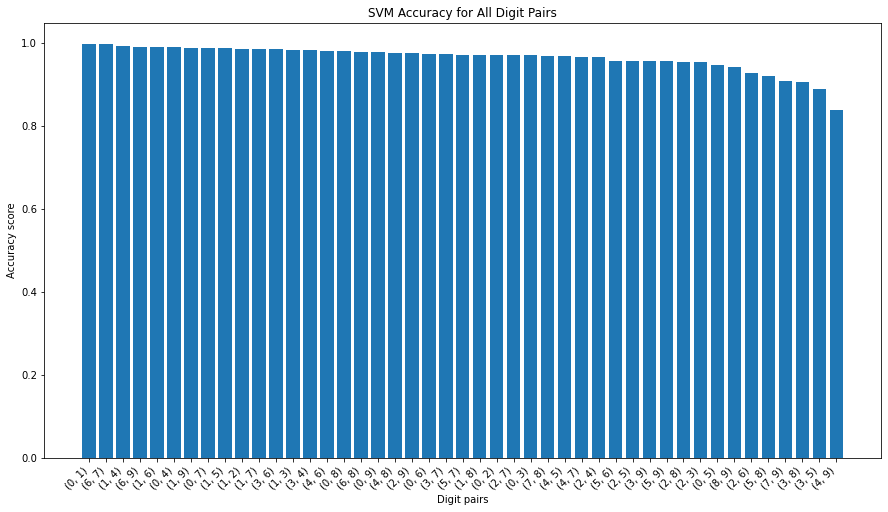

In [91]:
# Sort the accuracy scores dictionary by value
sorted_accuracy_scores = dict(sorted(accuracy_scores_svm.items(), key=lambda x: -x[1]))

# Create a bar chart of the sorted accuracy scores
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()))
ax.set_xticks(range(len(sorted_accuracy_scores)))
ax.set_xticklabels([str(pair) for pair in sorted_accuracy_scores.keys()], rotation=45, ha='right')
ax.set_xlabel('Digit pairs')
ax.set_ylabel('Accuracy score')
ax.set_title('SVM Accuracy for All Digit Pairs')
plt.show()